<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/04_digging_further_into_data_wrangling/04_estimating_building_height.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This exercise aims to build on your knowledge of the big-four data science libraries to use Kestrel atmospheric measurement devices to estimate the height difference between the ground floor and sixth floor of the Geology building.

# Background

Air pressure monotonically decreases with height in the atmosphere.  This is simply due to the fact that *air pressure is a measure of the weight of everything above*.  So higher up in the atmosphere there is less atmosphere (weight) above, and pressure decreases.

One of the basic principles of fluid dynamics is that a *pressure gradient*--a change in pressure over some distance--exerts a net force on the fluid that, in the absence of other forces, would cause the fluid to move.  So why then does the atmosphere not flow away to space in response to this pressure gradient?

To a very good approximation, the atmosphere is in *hydrostatic balance*, meaning that the vertical pressure gradient is balanced by the force of gravity on the air; gravity effectively negates the pressure gradient force.  This leads to one of the most essential equations in atmospheric science:

$$ \frac{\partial p}{\partial z} = -\rho g$$

where $p$ is the atmospheric pressure, $z$ is height away from the surface, $\rho$ is air density, and $g$ is the gravitational acceleration (we'll use $g \approx 9.806~\text{m s}^{-2}$ here).

If we combine this with the ideal gas law (written in a form that is convenient for atmospheric gasses, where $R_d \approx 287~\text{J kg}^{-1}\text{K}^{-1}$ represents a constant for air with the composition of Earth's atmosphere), we get a differential equation for pressure.

$$\text{Ideal gas law: }~p = \rho R_d T \to $$

$$ \frac{\partial p}{\partial z} = - \frac{p g}{R_d T} $$

We can approximate the derivatives in this equation using finite differences: $\partial p/\partial z \to \Delta p / \Delta z$, where $\Delta$ represents a (presumably small) difference between two pressure or height measurements.  We can then use this to solve for the change in height as a function of changes in pressure:

$$ \Delta z \approx - \frac{R_d T}{g} \frac{\Delta p}{p}$$

# Estimating height

Now imagine that we have a device that records pressure and temperature every second or so.  If you take that device and walk up a set of stairs, the recorded pressure will drop a bit for every second that you're ascending.  A pair of measurements taken at consecutive times can be used to estimate $\Delta p$, and the average of the two measurements can be used to estimate $p$ and $T$ over tha same time frame.  These values can be plugged in to the above formula to estimate the change in height between the two measurements.  The sum of all the changes in height then gives an estimate of the total change in height; we will have numerically integrated the differential equation that comes from combining hydrostatic balance and the ideal gas law.

## Instructions

1. form groups of two or three
1. acquaint yourself with the Kestrel measuring devices, and pair it to at least one of your phones using [Kestrel Link](https://kestrelinstruments.com/link-connectivity)
1. ensure that you can record measurements and export them to csv
1. take the kestrel device down to the ground floor of the Geology building; go to the loop
1. start recording
1. either walk up the stairwell, or take the elevator, up to the 7th floor (you can only access this floor from the western stairwell)
1. end recording
1. export the data to a CSV file and add it to your course git folder (into a folder for lesson 04)
1. estimate the difference in height between the two floors using the method above (*hint*: you should use `pandas`, and you should be able to make a new column for the calculation of $\Delta p$ and $\Delta z$ for each measurement, and then use the `.sum()` method)

# Data collection process

I paired the kestrel device, 2414781, with my iphone, walked down to the first floor, started recording on the Kestrel Link app, then walked slowly up to the 7th floor while recording.  I waited for about 20 seconds on the 7th floor before I finished recording.  I then saved the recording session and exported it to a CSV file that I uploaded to Google Drive and then copied locally here: `WEATHER_-_2414781_Sep_15_2023_2_56_14_PM.csv`.

# Thoughts about the data file

Inspection of the data file shows that it has 5 rows of what appear to be header data, e.g.:

```
Device Name,WEATHER - 2414781
Device Model,5500L
Serial Number,2414781
FORMATTED DATE_TIME,Temperature,Wet Bulb Temp,Relative Humidity,Barometric Pressure,Altitude,Station Pressure,Wind Speed,Heat Index,Dew Point,Density Altitude,Crosswind,Headwind,Compass Magnetic Direction,Compass True Direction,Wind Chill
yyyy-MM-dd hh:mm:ss a,°C,°C,%,mb,m,mb,km/h,°C,°C,m,km/h,km/h,Deg,Deg,°C,Data Type,Record name,Start time,Duration (H:M:S),Location description,Location address,Location coordinates,Notes
2023-09-15 02:53:19 PM,21.0,14.9,52.8,992.0,176,992.0,0.0,20.5,11.0,487,--,--,--,--,21.0,session,"Session - Sep 15, 2023 2:53:18 PM",2023-09-15 02:53:18 PM 2:53:18 PM,00:02:58,,,,Enter Notes
2023-09-15 02:53:24 PM,21.1,14.9,52.5,992.2,173,992.3,1.2,20.4,11.0,484,--,--,--,--,21.0,session,"Session - Sep 15, 2023 2:53:18 PM",2023-09-15 02:53:18 PM 2:53:18 PM,00:02:58,,,,Enter Notes
...
```

For the purposes of this analysis, I don't really care about the first three rows.  The fourth row, index 3, appears to have good column names, so I'll try to use that for the header.  The fifth row (index 4) has the units of the data.  While I would like to include the units, I'll just make note here that the temperatures are in Celsius and the pressures are in mb (hPa), so I'll have to convert before plugging in to the hydrostatic equation.

n.b. when playing around with opening the file, I found that the number of columns in the header row didn't match the actual number of data columns.  I used the `usecols` argument to force usage of only the first 16 columns, which contain the data I want.

In [1]:
""" Read the data file. """
import pandas as pd

# set the file name
data_file = "WEATHER_-_2414781_Sep_15_2023_2_56_14_PM.csv"

# read the data file
kestrel_pd = pd.read_csv(data_file, header = 0, skiprows = [0,1,2,4], usecols=range(0,16), parse_dates=[0])

# show part of the data frame
kestrel_pd.head()

,FORMATTED DATE_TIME,Temperature,Wet Bulb Temp,Relative Humidity,Barometric Pressure,Altitude,Station Pressure,Wind Speed,Heat Index,Dew Point,Density Altitude,Crosswind,Headwind,Compass Magnetic Direction,Compass True Direction,Wind Chill
0,2023-09-15 14:53:19,21.0,14.9,52.8,992.0,176,992.0,0.0,20.5,11.0,487,--,--,--,--,21.0
1,2023-09-15 14:53:24,21.1,14.9,52.5,992.2,173,992.3,1.2,20.4,11.0,484,--,--,--,--,21.0
2,2023-09-15 14:53:29,21.2,14.9,51.4,991.7,178,991.8,0.0,20.7,10.8,493,--,--,--,--,21.2
3,2023-09-15 14:53:34,21.3,14.9,50.5,991.7,178,991.8,0.0,20.7,10.6,496,--,--,--,--,21.2
4,2023-09-15 14:53:39,21.3,14.9,50.6,991.7,178,991.8,0.0,20.7,10.6,495,--,--,--,--,21.2


# Exploratory data analysis

Before attempting the height estimate, I want to just look at the data in the form of plots.

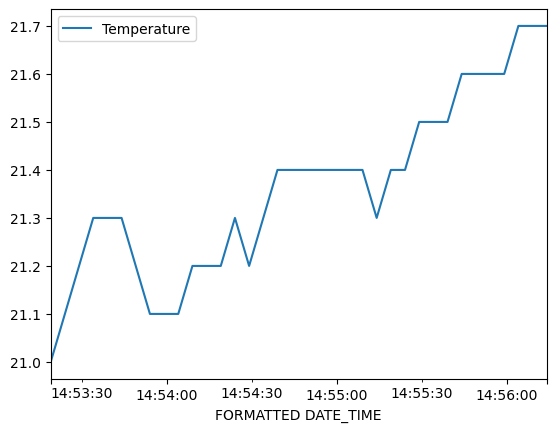

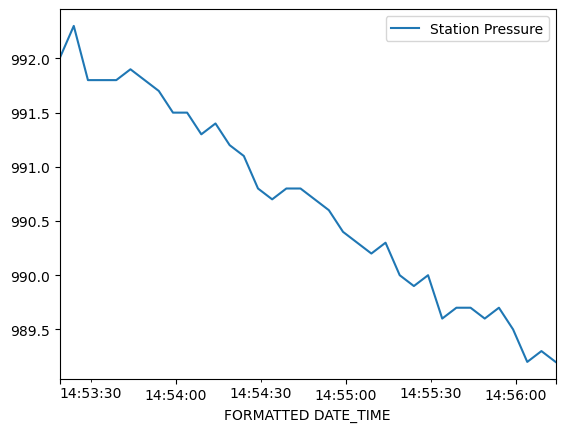

In [2]:
import matplotlib.pyplot as plt
kestrel_pd.plot("FORMATTED DATE_TIME", "Temperature")
plt.show()

kestrel_pd.plot("FORMATTED DATE_TIME", "Station Pressure")
plt.show()

It looks like I started recording around 2:53pm (9/15/2023) according to the plots, which seems about right; I ascended the stairwell in about three minutes.  Pressure steadily (approximately linearly) decreased as I ascended, as expected.  The temperature rose by about 0.7 C, which makes sense given that the air in the stairwell probably isn't well mixed and that warm air probably rises to the top of the stairwell.

In [3]:
""" Show statistics of the various columns. """
kestrel_pd.describe()

,Temperature,Wet Bulb Temp,Relative Humidity,Barometric Pressure,Altitude,Station Pressure,Wind Speed,Heat Index,Dew Point,Density Altitude,Wind Chill
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,21.361111,15.611111,55.605556,990.625000,187.527778,990.669444,0.519444,21.052778,12.047222,515.638889,21.330556
std,0.187125,0.888266,6.532116,0.911945,7.926398,0.920813,0.723017,0.311206,1.674257,15.840550,0.186424
min,21.000000,14.800000,48.500000,989.200000,173.000000,989.200000,0.000000,20.400000,10.300000,484.000000,21.000000
25%,21.200000,14.900000,50.475000,989.850000,180.000000,989.850000,0.000000,20.800000,10.775000,497.750000,21.200000
50%,21.400000,15.250000,53.500000,990.700000,187.500000,990.700000,0.000000,21.100000,11.550000,521.000000,21.300000
75%,21.500000,16.200000,59.700000,991.500000,194.250000,991.500000,1.300000,21.200000,13.200000,528.000000,21.500000
max,21.700000,17.700000,70.500000,992.200000,200.000000,992.300000,2.300000,21.700000,15.800000,538.000000,21.700000


In looking at the summary, it occurs to me that I could estimate the building height simply by using the min and max pressure recorded.  From a calculus standpoint, this would be reasonable, considering that the plot above shows that the pressure change is approximately linear; the finite difference approximation is valid.  I'll try that before doing the numerical integration.

In [4]:
""" Estimate building height using the min/max pressure """
# set constants
Rd = 287 # J/kg/K
g = 9.806 # m/s/s
T = kestrel_pd['Temperature'].mean() # C
P = kestrel_pd['Station Pressure'].mean() # hPa
Pmin = kestrel_pd['Station Pressure'].min() # hPa
Pmax = kestrel_pd['Station Pressure'].max() # hPa

# convert to MKS
T = T + 273.15
P = P * 100
Pmin = Pmin * 100
Pmax = Pmax * 100

# calculate the change in height
dP = Pmin - Pmax
dz = -(Rd*T/g)*(dP/P)

m_to_ft = 3.2808399 # ft/m

print(f"The building height is {dz:2.2f} m, or {dz*m_to_ft:2.2f} ft")

The building height is 26.97 m, or 88.49 ft


# Estimation by numerical integration

The above shows that, by a simple method, I estimate the building height at about 88.5 ft, which seems reasonable; the typical height between floors in US buildings is somewhere between 10-15 ft.  This seems to imply that floors have slightly more than 12 ft between them.

Now I'm going to estimate the building height by examining the changes in height between measurements.

I'll use the `pandas.diff()` method to do this.  Note that pandas sets the first dP value to NaN, so I need to decide how to set it; I'll simply set it to zero.

In [5]:
""" Estimate dp """

# calculate the change in pressure between measurements
kestrel_pd['dP'] = kestrel_pd['Station Pressure'].diff()*100 # Pa

# set the first value to zero (instead of NaN)
kestrel_pd.loc[0,'dP'] = 0

# show the first part of the new dP column
kestrel_pd['dP'].head()

0     0.0
1    30.0
2   -50.0
3     0.0
4     0.0
Name: dP, dtype: float64

We also need to average station pressure between consecutive values in order to be consistent with the finite difference.  I'll use the `pandas.shift` method to accomplish this.  We also need to deal with a NaN value in the first row.

In [6]:
# calculate the average pressure between adjacent measurements
kestrel_pd['Pavg'] = 0.5*(kestrel_pd['Station Pressure'].shift(0) + kestrel_pd['Station Pressure'].shift(1))*100
kestrel_pd.loc[0,'Pavg'] = kestrel_pd.loc[1,'Pavg'] # set the first value to the first actual value
kestrel_pd['Pavg'].head()

0    99215.0
1    99215.0
2    99205.0
3    99180.0
4    99180.0
Name: Pavg, dtype: float64

In [7]:
""" Calculate the changes in height. """
# calculate using the hypsometric relationship, also converting temperature to K on the fly
kestrel_pd['dz'] = -(Rd*(kestrel_pd['Temperature'] + 273.15)/g)*(kestrel_pd['dP']/kestrel_pd['Pavg']) # m
# show the first few rows of height change
kestrel_pd['dz'].head()

0   -0.000000
1   -2.604056
2    4.342007
3   -0.000000
4   -0.000000
Name: dz, dtype: float64

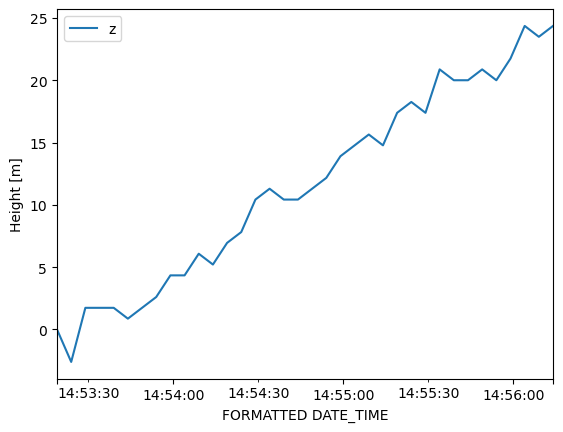

In [8]:
""" Estimate the relative height of each measurement """

# estimated height is the cumulative sum of height changes
kestrel_pd['z'] = kestrel_pd['dz'].cumsum()

# plot height as a function of time
fig, ax = plt.subplots()
kestrel_pd.plot('FORMATTED DATE_TIME', 'z', ax = ax)
ax.set_ylabel("Height [m]")
plt.show()

The above plot shows that my estimated height, relative to the ground floor, steadily increased with time, which is consistent with my walking up the stairwell during that time.  The maximum height is estimated to be just under 25 m, whereas the height from the simple estimation method is nearly 27 m.  So there is clearly error in one or the other estimation methods.  Regardless, the two methods are roughly consistent.